In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt
import seaborn
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

# Observing and cleaning the data

In [2]:
data = pd.read_csv('data/healthcare-dataset-stroke-data.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
data['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [5]:
# removing row with "Other" gender
data = data.drop(data[data['gender']=='Other'].index)

In [6]:
data['gender'].value_counts()

Female    2994
Male      2115
Name: gender, dtype: int64

In [7]:
# counting rows with null values in it
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [8]:
# calculating average bmi (mean)
print(data['bmi'].mean())

28.894559902200488


In [9]:
# filling null values in bmi column with the bmi mean
data['bmi'] = data['bmi'].fillna(data['bmi'].mean())

In [10]:
# checking for nulls again
data['bmi'].isnull().sum()

0

In [11]:
# creating new dataframe with stroke and no stroke counts (0 = no stroke, 1 = stroke)
stroke_count_df = pd.DataFrame(data.groupby('stroke')['stroke'].count())
stroke_count_df

,stroke
stroke,
0,4860
1,249


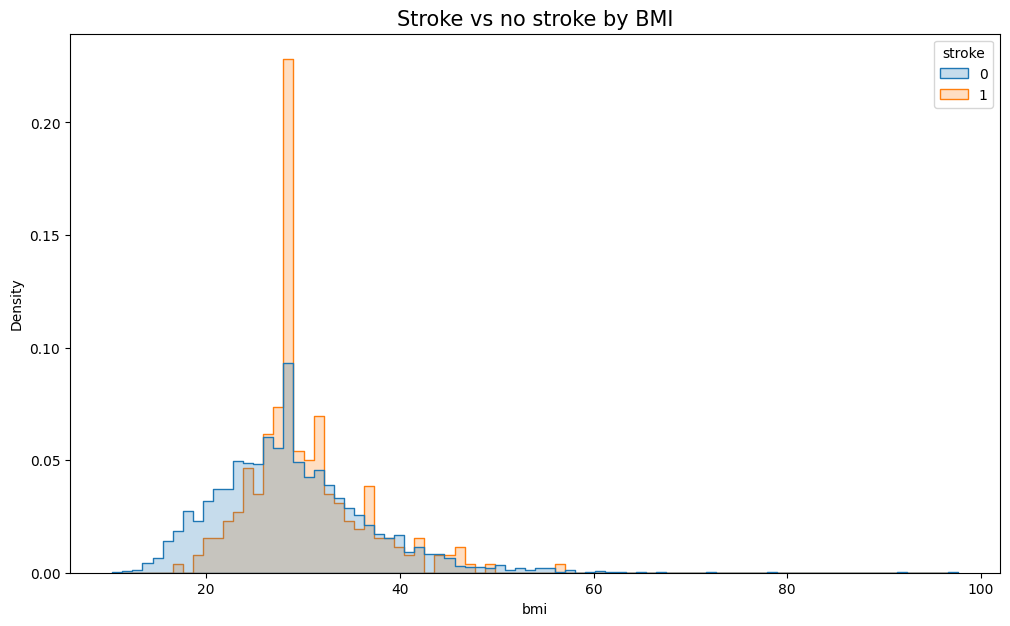

In [12]:
plt.figure(figsize=(12,7))
seaborn.histplot(
    data, x="bmi", hue="stroke",
    element="step",
    stat="density", common_norm=False,
)
plt.title('Stroke vs no stroke by BMI', fontsize=15)
plt.show()

In [13]:
print(stats.pearsonr(x=data['bmi'],y=data['stroke']))

PearsonRResult(statistic=0.03891685046419615, pvalue=0.005401781842834262)


In [14]:
print(stats.pearsonr(x=data['age'],y=data['stroke']))

PearsonRResult(statistic=0.24523875623198607, pvalue=7.435468822674816e-71)


In [15]:
print(stats.pearsonr(x=data['avg_glucose_level'],y=data['stroke']))

PearsonRResult(statistic=0.13199119156646016, pvalue=2.705302697189168e-21)


In [16]:
data['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64

In [17]:
obj_cols=['gender', 'ever_married', 'Residence_type']

lb=LabelEncoder()

for i in obj_cols:
    print(f"Value Counts of column:{i}")
    print(data.loc[:,i].value_counts())
    data[i] = lb.fit_transform(data[i])
    print("The classes which labeled from 0 are: ",lb.classes_,end="\n===========================================\n")

Value Counts of column:gender
Female    2994
Male      2115
Name: gender, dtype: int64
The classes which labeled from 0 are:  ['Female' 'Male']
Value Counts of column:ever_married
Yes    3353
No     1756
Name: ever_married, dtype: int64
The classes which labeled from 0 are:  ['No' 'Yes']
Value Counts of column:Residence_type
Urban    2596
Rural    2513
Name: Residence_type, dtype: int64
The classes which labeled from 0 are:  ['Rural' 'Urban']


In [18]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,Private,1,228.69,36.60000,formerly smoked,1
1,51676,0,61.0,0,0,1,Self-employed,0,202.21,28.89456,never smoked,1
2,31112,1,80.0,0,1,1,Private,0,105.92,32.50000,never smoked,1
3,60182,0,49.0,0,0,1,Private,1,171.23,34.40000,smokes,1
4,1665,0,79.0,1,0,1,Self-employed,0,174.12,24.00000,never smoked,1


In [19]:
print(stats.spearmanr(a=data['gender'],b=data['stroke']))

SpearmanrResult(correlation=0.009080600160079336, pvalue=0.5163958663824182)


In [20]:
print(stats.spearmanr(a=data['ever_married'],b=data['stroke']))

SpearmanrResult(correlation=0.10829931566075394, pvalue=8.367746992154256e-15)


In [21]:
print(stats.spearmanr(a=data['hypertension'],b=data['stroke']))

SpearmanrResult(correlation=0.12789125912919305, pvalue=4.4414725683755856e-20)


In [22]:
print(stats.spearmanr(a=data['heart_disease'],b=data['stroke']))

SpearmanrResult(correlation=0.13490484180042858, pvalue=3.506802133148936e-22)


In [23]:
print(stats.spearmanr(a=data['Residence_type'],b=data['stroke']))

SpearmanrResult(correlation=0.015414584210315819, pvalue=0.2706407299191361)


In [24]:
data = pd.get_dummies(data)

In [25]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,1,67.0,0,1,1,1,228.69,36.60000,1,0,0,1,0,0,0,1,0,0
1,51676,0,61.0,0,0,1,0,202.21,28.89456,1,0,0,0,1,0,0,0,1,0
2,31112,1,80.0,0,1,1,0,105.92,32.50000,1,0,0,1,0,0,0,0,1,0
3,60182,0,49.0,0,0,1,1,171.23,34.40000,1,0,0,1,0,0,0,0,0,1
4,1665,0,79.0,1,0,1,0,174.12,24.00000,1,0,0,0,1,0,0,0,1,0


In [26]:
print(stats.spearmanr(a=data['smoking_status_smokes'],b=data['stroke']))

SpearmanrResult(correlation=0.008920477479368813, pvalue=0.5238200265767476)


# Working with imbalanced data

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [28]:
y = data['stroke']
X = np.array(data['bmi']).reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(4087, 1) (1022, 1)
(4087,) (1022,)


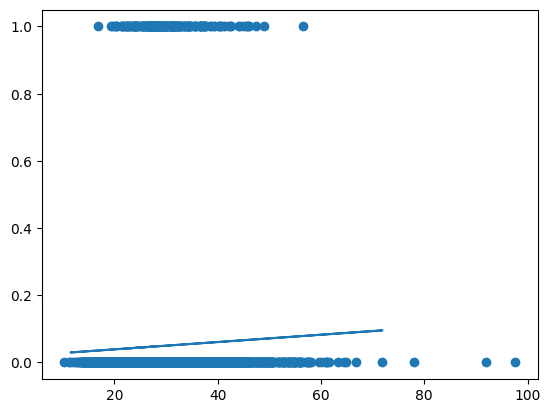

In [36]:
lg = LinearRegression().fit(X, y)
y_pred_1 = lg.predict(X_test)
plt.scatter(X, y)
plt.plot(X_test, y_pred)

In [45]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=5000)
clf.fit(X_train, y_train)
y_pred_2 = clf.predict(X_test)
clf.coef_

array([[-0.24415475]])

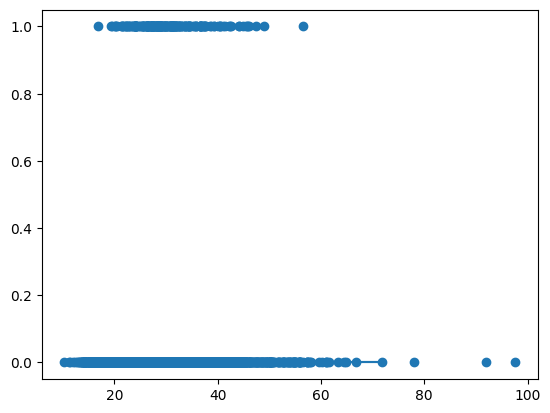

In [47]:
plt.scatter(X, y)
plt.plot(X_test, y_pred_2)

In [67]:
report = classification_report(y_test, y_pred_2)
print(report)

ValueError: Found input variables with inconsistent numbers of samples: [92, 1022]

In [49]:
y = data['stroke']
X = data.drop('stroke', axis=1)

In [50]:
stroke = data[data.stroke == 1]
no_stroke = data[data.stroke == 0]
no_stroke_sample = no_stroke.sample(n=208, random_state=42)

final = pd.concat([stroke, no_stroke_sample])

print(stroke.shape[0])
print(no_stroke_sample.shape[0])
print(final.shape[0])

249
208
457


In [51]:
y = final['stroke']
X = final.drop('stroke', axis=1)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(365, 18) (92, 18)
(365,) (92,)


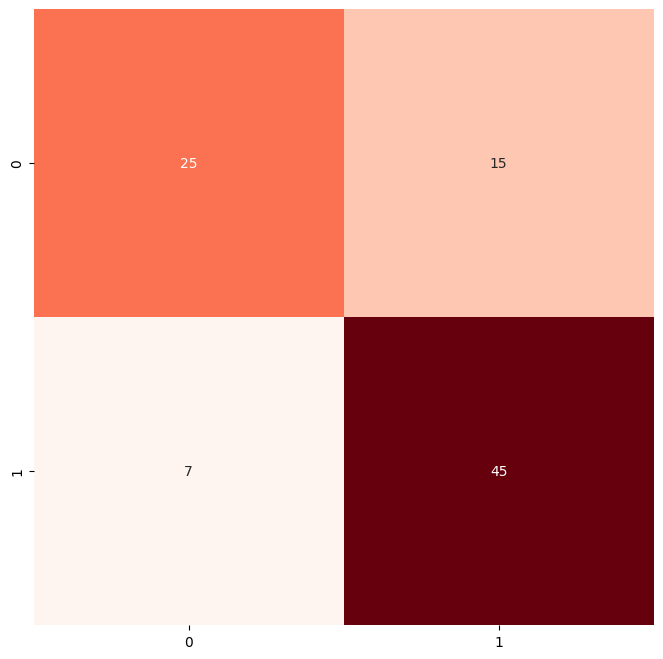

In [54]:
logreg = LogisticRegression(max_iter=300)
logreg.fit(X_train, y_train)

y_pred_l = logreg.predict(X_test)

lr_conf_mat = confusion_matrix(y_test, y_pred_l)

plt.figure(figsize=(8,8))
seaborn.heatmap(lr_conf_mat, annot=True, fmt='.0f', cmap='Reds', cbar=False)
plt.show()

In [55]:
report = classification_report(y_test, y_pred_l)
print(report)

              precision    recall  f1-score   support

           0       0.78      0.62      0.69        40
           1       0.75      0.87      0.80        52

    accuracy                           0.76        92
   macro avg       0.77      0.75      0.75        92
weighted avg       0.76      0.76      0.76        92



In [56]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)

acc_tree = accuracy_score(y_test, y_pred)

print(f'the accuracy for decision tree is {round(100 * acc_tree, 2)} %')

the accuracy for decision tree is 69.57 %


In [57]:
tree_matrix = confusion_matrix(y_test, y_pred)

upper, lower = tree_matrix
TN, FP = upper
FN, TP = lower

accuracy = (TN + TP) / (TN + TP + FN + FP)
precision = (TP) / (TP + FP)
recall = (TP) / (TP + FN)

print(f'the accuracy is {round(accuracy, 3)}')
print(f'the precision is {round(precision, 3)}')
print(f'the recall is {round(recall, 3)}')

the accuracy is 0.696
the precision is 0.714
the recall is 0.769


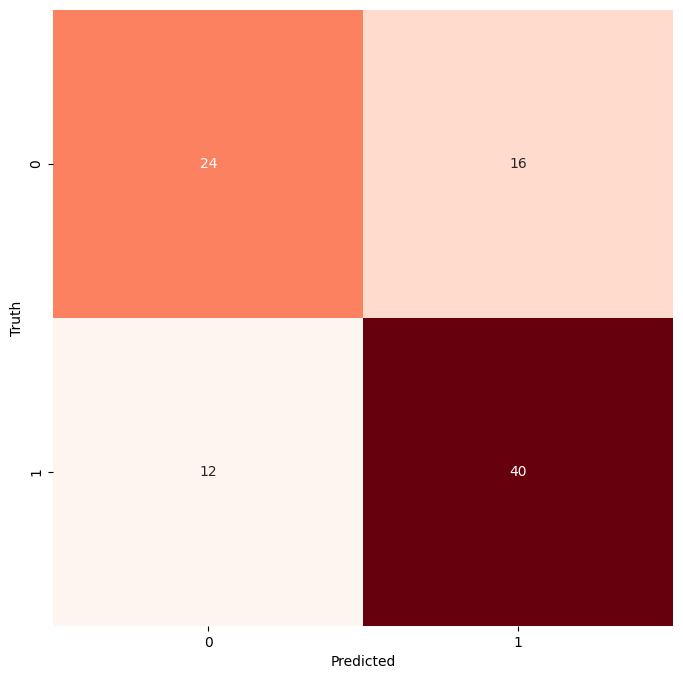

In [59]:
plt.figure(figsize=(8,8))
seaborn.heatmap(tree_matrix, annot=True, cbar=False, fmt='.0f', cmap='Reds')
plt.ylabel('Truth')
plt.xlabel('Predicted')
plt.show()

In [60]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.67      0.60      0.63        40
           1       0.71      0.77      0.74        52

    accuracy                           0.70        92
   macro avg       0.69      0.68      0.69        92
weighted avg       0.69      0.70      0.69        92



In [61]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train)

y_forest = forest.predict(X_test)

acc_forest = accuracy_score(y_test, y_forest)
print(f'the accuracy for the random forest is: {round(100 * acc_forest, 2)}%')

the accuracy for the random forest is: 76.09%


In [62]:
forest_mat = confusion_matrix(y_test, y_forest)

upper, bottom = forest_mat

TN, FP = upper
FN, TP = bottom

precision = TP / (TP + FP)
recall = TP / (TP + FN)

print(f'the precision of the random forest is {(round(precision, 3))}')
print(f'the recall of the random forest is {(round(recall, 3))}')

the precision of the random forest is 0.742
the recall of the random forest is 0.885


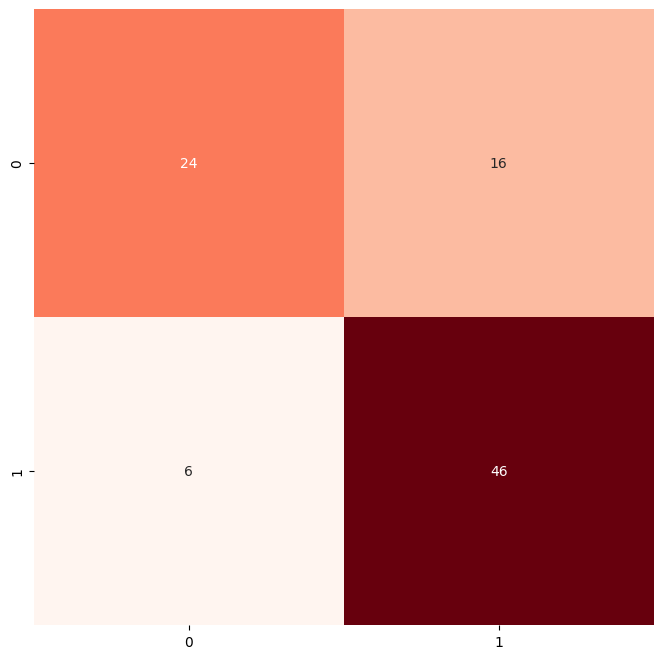

In [64]:
plt.figure(figsize=(8,8))

seaborn.heatmap(forest_mat, annot=True, fmt='.0f', cbar=False, cmap='Reds')

plt.show()

In [68]:
from xgboost import XGBClassifier
xgb = XGBClassifier(eval_metric= 'error', learning_rate= 0.05)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='error', gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [69]:
y_pred_train_xgb = xgb.predict(X_train)
acc_train_xgb = accuracy_score(y_train, y_pred_train_xgb)

y_pred_test_xgb = xgb.predict(X_test)
acc_test_xgb = accuracy_score(y_test, y_pred_test_xgb)

print(acc_train_xgb)
print(acc_test_xgb)

0.9835616438356164
0.7608695652173914


In [72]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,\
roc_auc_score, roc_curve, plot_roc_curve, auc
xgb_perc_score = precision_score(y_test, y_pred_test_xgb)
xgb_rec_score= recall_score(y_test, y_pred_test_xgb)
xgb_f1_score = f1_score(y_test, y_pred_test_xgb)

print('Precision: %.3f' %xgb_perc_score )
print('Recall: %.3f' % xgb_rec_score)
print('F-measure: %.3f' % xgb_f1_score)

Precision: 0.750
Recall: 0.865
F-measure: 0.804


# First model with relu activation

In [74]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [75]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [92]:
model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(18,)))
model.add(Dense(2048, activation='relu'))
model.add(Dense(2048, activation='relu'))
model.add(Dense(2048, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [93]:
history = model.fit(X_train, y_train,
           validation_data=(X_val, y_val),
           epochs=50,
           batch_size=32)

Epoch 1/50
10/10 [==============================] - 1s 57ms/step - loss: 2066.7688 - accuracy: 0.4863 - val_loss: 52.2723 - val_accuracy: 0.4384
Epoch 2/50
10/10 [==============================] - 0s 49ms/step - loss: 130.9514 - accuracy: 0.5137 - val_loss: 8.7084 - val_accuracy: 0.4521
Epoch 3/50
10/10 [==============================] - 0s 47ms/step - loss: 12.1586 - accuracy: 0.5068 - val_loss: 17.3279 - val_accuracy: 0.4384
Epoch 4/50
10/10 [==============================] - 0s 49ms/step - loss: 7.2737 - accuracy: 0.5137 - val_loss: 2.2516 - val_accuracy: 0.5616
Epoch 5/50
10/10 [==============================] - 0s 46ms/step - loss: 1.8396 - accuracy: 0.5205 - val_loss: 1.9120 - val_accuracy: 0.4521
Epoch 6/50
10/10 [==============================] - 0s 49ms/step - loss: 1.0137 - accuracy: 0.4623 - val_loss: 1.2843 - val_accuracy: 0.5616
Epoch 7/50
10/10 [==============================] - 0s 48ms/step - loss: 1.0091 - accuracy: 0.5240 - val_loss: 0.9681 - val_accuracy: 0.5616
Epoch

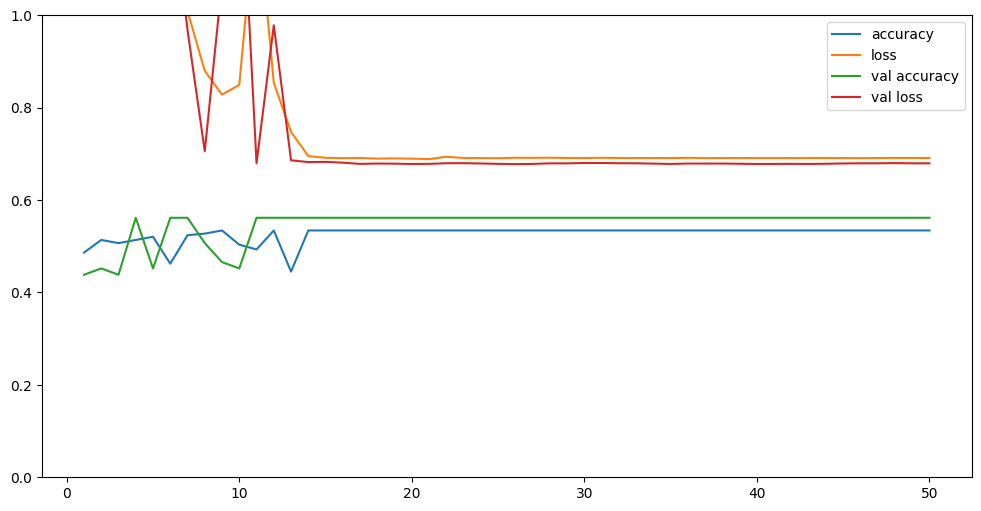

In [94]:
n_epoch = range(1,51)

plt.figure(figsize=(12,6))

seaborn.lineplot(data=history.history, x=n_epoch, y='accuracy', label='accuracy')
seaborn.lineplot(data=history.history, x=n_epoch, y='loss', label='loss')
seaborn.lineplot(data=history.history, x=n_epoch, y='val_accuracy', label='val accuracy')
seaborn.lineplot(data=history.history, x=n_epoch, y='val_loss', label='val loss')

plt.legend()
plt.ylim([0,1])
plt.ylabel(None)
plt.show()

# Second model with leaky relu activation

In [95]:
del model

In [96]:
del history

In [97]:
model = Sequential()
model.add(Dense(1024, activation='leaky_relu', input_shape=(18,)))
model.add(Dense(2048, activation='leaky_relu'))
model.add(Dense(2048, activation='leaky_relu'))
model.add(Dense(2048, activation='leaky_relu'))
model.add(Dense(1024, activation='leaky_relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [98]:
history = model.fit(X_train, y_train,
           validation_data=(X_val, y_val),
           epochs=50,
           batch_size=32)

Epoch 1/50
10/10 [==============================] - 1s 57ms/step - loss: 6737.6152 - accuracy: 0.5548 - val_loss: 716.6705 - val_accuracy: 0.4384
Epoch 2/50
10/10 [==============================] - 0s 48ms/step - loss: 846.1942 - accuracy: 0.5548 - val_loss: 1167.3918 - val_accuracy: 0.4384
Epoch 3/50
10/10 [==============================] - 0s 47ms/step - loss: 647.1536 - accuracy: 0.5479 - val_loss: 22.8225 - val_accuracy: 0.5616
Epoch 4/50
10/10 [==============================] - 0s 48ms/step - loss: 86.9724 - accuracy: 0.5274 - val_loss: 154.7557 - val_accuracy: 0.4384
Epoch 5/50
10/10 [==============================] - 0s 46ms/step - loss: 95.1618 - accuracy: 0.5274 - val_loss: 39.5760 - val_accuracy: 0.5616
Epoch 6/50
10/10 [==============================] - 0s 48ms/step - loss: 15.4783 - accuracy: 0.5205 - val_loss: 5.7684 - val_accuracy: 0.5616
Epoch 7/50
10/10 [==============================] - 0s 48ms/step - loss: 30.3048 - accuracy: 0.4521 - val_loss: 74.3368 - val_accuracy:

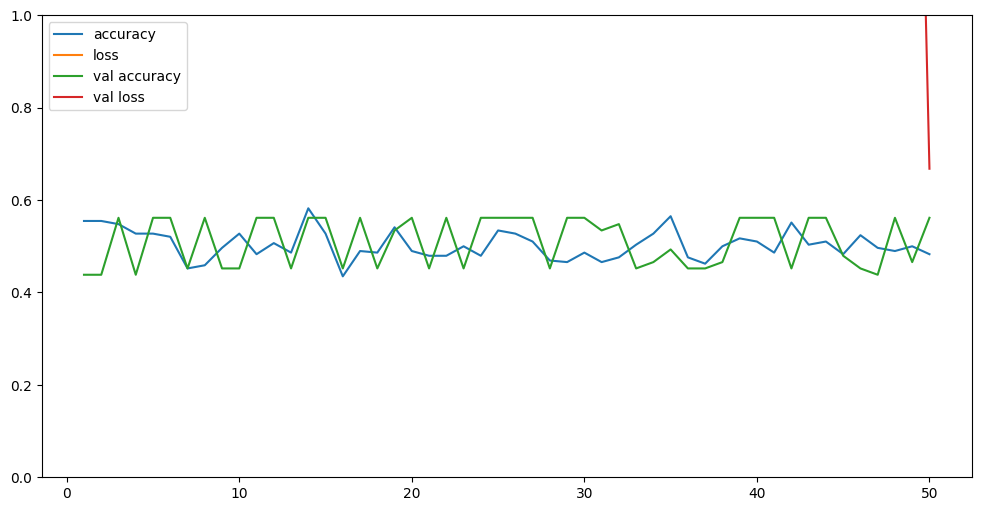

In [99]:
n_epoch = range(1,51)

plt.figure(figsize=(12,6))

seaborn.lineplot(data=history.history, x=n_epoch, y='accuracy', label='accuracy')
seaborn.lineplot(data=history.history, x=n_epoch, y='loss', label='loss')
seaborn.lineplot(data=history.history, x=n_epoch, y='val_accuracy', label='val accuracy')
seaborn.lineplot(data=history.history, x=n_epoch, y='val_loss', label='val loss')

plt.legend()
plt.ylim([0,1])
plt.ylabel(None)
plt.show()

# Third model with dropout

In [101]:
del model
del history

In [104]:
model = Sequential()

model.add(Dense(512, activation='relu', input_shape=(18,)))
model.add(Dropout(0.25))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [105]:
history = model.fit(X_train, y_train,
             validation_data=(X_val, y_val),
             epochs=50,
             batch_size=32)

Epoch 1/50
10/10 [==============================] - 1s 27ms/step - loss: 1170.6915 - accuracy: 0.5377 - val_loss: 172.4884 - val_accuracy: 0.5616
Epoch 2/50
10/10 [==============================] - 0s 15ms/step - loss: 118.3402 - accuracy: 0.4692 - val_loss: 16.3017 - val_accuracy: 0.5616
Epoch 3/50
10/10 [==============================] - 0s 16ms/step - loss: 17.6289 - accuracy: 0.5068 - val_loss: 19.4490 - val_accuracy: 0.4384
Epoch 4/50
10/10 [==============================] - 0s 16ms/step - loss: 14.0556 - accuracy: 0.4041 - val_loss: 12.4611 - val_accuracy: 0.5479
Epoch 5/50
10/10 [==============================] - 0s 16ms/step - loss: 13.5692 - accuracy: 0.5000 - val_loss: 5.4935 - val_accuracy: 0.5616
Epoch 6/50
10/10 [==============================] - 0s 16ms/step - loss: 7.1374 - accuracy: 0.5479 - val_loss: 0.7554 - val_accuracy: 0.4658
Epoch 7/50
10/10 [==============================] - 0s 16ms/step - loss: 7.3758 - accuracy: 0.5274 - val_loss: 5.2435 - val_accuracy: 0.4384


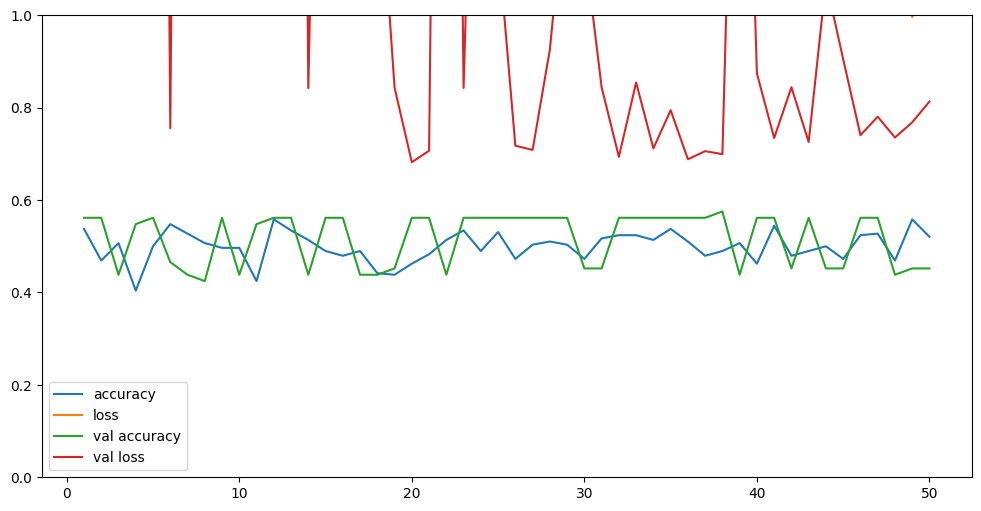

In [106]:
n_epoch = range(1,51)

plt.figure(figsize=(12,6))

seaborn.lineplot(data=history.history, x=n_epoch, y='accuracy', label='accuracy')
seaborn.lineplot(data=history.history, x=n_epoch, y='loss', label='loss')
seaborn.lineplot(data=history.history, x=n_epoch, y='val_accuracy', label='val accuracy')
seaborn.lineplot(data=history.history, x=n_epoch, y='val_loss', label='val loss')

plt.legend()
plt.ylim([0,1])
plt.ylabel(None)
plt.show()

# Data resampling

In [177]:
x = data.drop("stroke" , axis = 1).values
y = data["stroke"]

In [178]:
X_train, X_test, y_train , y_test = train_test_split(x, y, test_size=0.15 , random_state=42)

In [179]:
from sklearn.preprocessing import MinMaxScaler 
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)

0    4860
1     249
Name: stroke, dtype: int64


<AxesSubplot: >

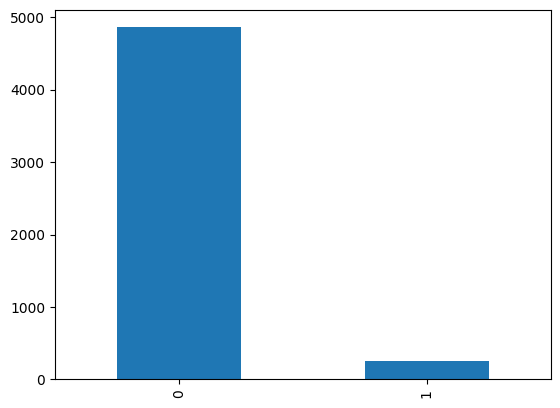

In [180]:
print(data['stroke'].value_counts())
data['stroke'].value_counts().sort_index().plot.bar()

In [181]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train.ravel())

In [182]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Trying model 3 again

In [183]:
del model
del history

In [184]:
model = Sequential()

model.add(Dense(512, activation='relu', input_shape=(18,)))
model.add(Dropout(0.25))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [185]:
history = model.fit(X_train, y_train,
             validation_data=(X_val, y_val),
             epochs=50,
             batch_size=32)

Epoch 1/50
207/207 [==============================] - 4s 16ms/step - loss: 0.4989 - accuracy: 0.7545 - val_loss: 0.4385 - val_accuracy: 0.7802
Epoch 2/50
207/207 [==============================] - 3s 15ms/step - loss: 0.4086 - accuracy: 0.8163 - val_loss: 0.3604 - val_accuracy: 0.8412
Epoch 3/50
207/207 [==============================] - 3s 16ms/step - loss: 0.3715 - accuracy: 0.8380 - val_loss: 0.3272 - val_accuracy: 0.8593
Epoch 4/50
207/207 [==============================] - 3s 15ms/step - loss: 0.3408 - accuracy: 0.8539 - val_loss: 0.2993 - val_accuracy: 0.8756
Epoch 5/50
207/207 [==============================] - 3s 16ms/step - loss: 0.3197 - accuracy: 0.8640 - val_loss: 0.3118 - val_accuracy: 0.8720
Epoch 6/50
207/207 [==============================] - 3s 15ms/step - loss: 0.2919 - accuracy: 0.8750 - val_loss: 0.2727 - val_accuracy: 0.8847
Epoch 7/50
207/207 [==============================] - 3s 15ms/step - loss: 0.2788 - accuracy: 0.8807 - val_loss: 0.2439 - val_accuracy: 0.8979

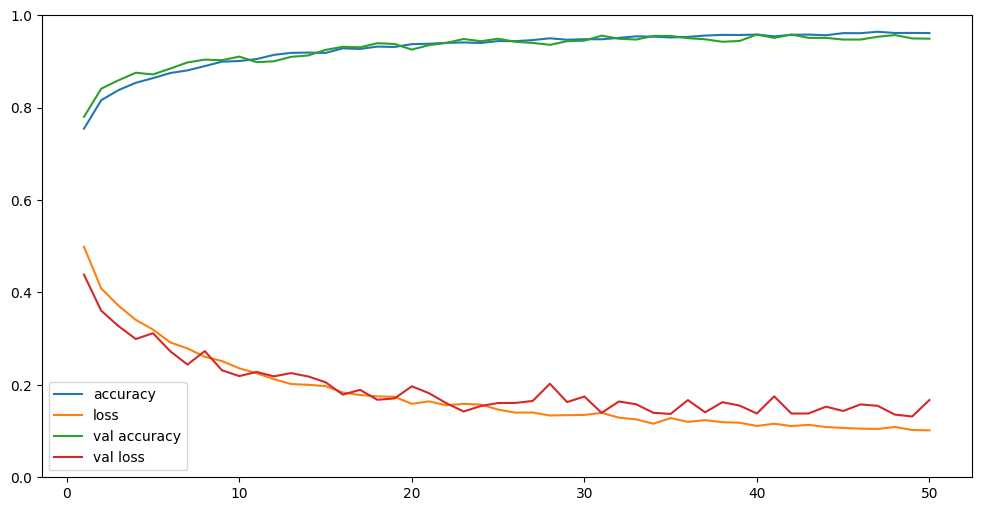

In [186]:
n_epoch = range(1,51)

plt.figure(figsize=(12,6))

seaborn.lineplot(data=history.history, x=n_epoch, y='accuracy', label='accuracy')
seaborn.lineplot(data=history.history, x=n_epoch, y='loss', label='loss')
seaborn.lineplot(data=history.history, x=n_epoch, y='val_accuracy', label='val accuracy')
seaborn.lineplot(data=history.history, x=n_epoch, y='val_loss', label='val loss')

plt.legend()
plt.ylim([0,1])
plt.ylabel(None)
plt.show()

In [187]:
model.evaluate(X_test, y_test)

24/24 [==============================] - 0s 4ms/step - loss: 0.9452 - accuracy: 0.9387


[0.9452054500579834, 0.9387223124504089]

# Trying model 1 again

In [188]:
del model
del history

In [189]:
model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(18,)))
model.add(Dense(2048, activation='relu'))
model.add(Dense(2048, activation='relu'))
model.add(Dense(2048, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [190]:
history = model.fit(X_train, y_train,
             validation_data=(X_val, y_val),
             epochs=50,
             batch_size=32)

Epoch 1/50
207/207 [==============================] - 10s 48ms/step - loss: 0.4693 - accuracy: 0.7828 - val_loss: 0.3896 - val_accuracy: 0.8213
Epoch 2/50
207/207 [==============================] - 10s 48ms/step - loss: 0.3837 - accuracy: 0.8351 - val_loss: 0.3332 - val_accuracy: 0.8527
Epoch 3/50
207/207 [==============================] - 10s 48ms/step - loss: 0.3322 - accuracy: 0.8611 - val_loss: 0.2971 - val_accuracy: 0.8708
Epoch 4/50
207/207 [==============================] - 10s 48ms/step - loss: 0.2972 - accuracy: 0.8721 - val_loss: 0.2930 - val_accuracy: 0.8810
Epoch 5/50
207/207 [==============================] - 10s 48ms/step - loss: 0.2770 - accuracy: 0.8839 - val_loss: 0.2695 - val_accuracy: 0.8919
Epoch 6/50
207/207 [==============================] - 10s 48ms/step - loss: 0.2373 - accuracy: 0.9005 - val_loss: 0.2275 - val_accuracy: 0.9010
Epoch 7/50
207/207 [==============================] - 10s 48ms/step - loss: 0.2277 - accuracy: 0.9088 - val_loss: 0.2288 - val_accuracy:

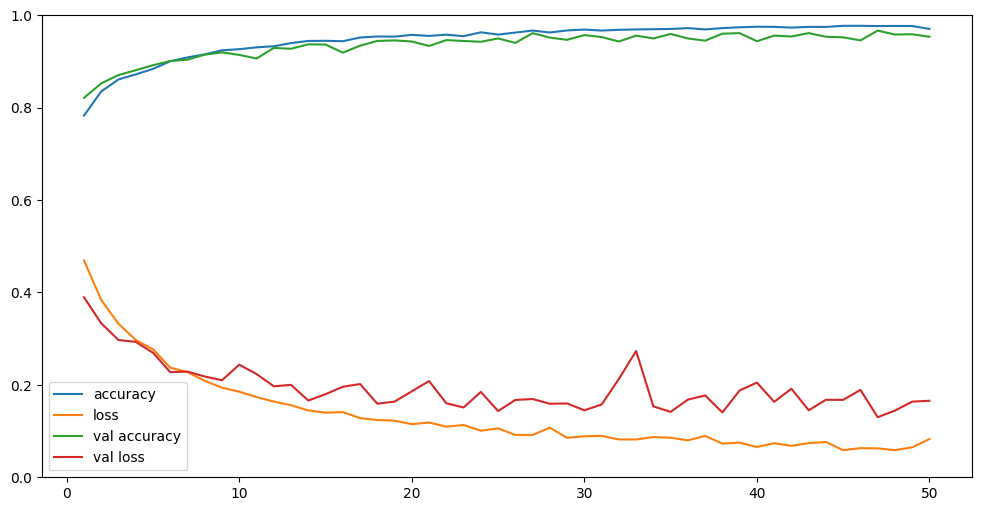

In [191]:
n_epoch = range(1,51)

plt.figure(figsize=(12,6))

seaborn.lineplot(data=history.history, x=n_epoch, y='accuracy', label='accuracy')
seaborn.lineplot(data=history.history, x=n_epoch, y='loss', label='loss')
seaborn.lineplot(data=history.history, x=n_epoch, y='val_accuracy', label='val accuracy')
seaborn.lineplot(data=history.history, x=n_epoch, y='val_loss', label='val loss')

plt.legend()
plt.ylim([0,1])
plt.ylabel(None)
plt.show()

In [192]:
model.evaluate(X_test, y_test)

24/24 [==============================] - 0s 9ms/step - loss: 0.9452 - accuracy: 0.9387


[0.9452054500579834, 0.9387223124504089]

# Trying smaller model

In [194]:
del model

In [195]:
del history

In [196]:
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(18,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [197]:
history = model.fit(X_train, y_train,
             validation_data=(X_val, y_val),
             epochs=50,
             batch_size=32)

Epoch 1/50
207/207 [==============================] - 1s 5ms/step - loss: 0.4581 - accuracy: 0.7832 - val_loss: 0.4460 - val_accuracy: 0.7959
Epoch 2/50
207/207 [==============================] - 1s 5ms/step - loss: 0.3606 - accuracy: 0.8483 - val_loss: 0.3358 - val_accuracy: 0.8490
Epoch 3/50
207/207 [==============================] - 1s 5ms/step - loss: 0.3279 - accuracy: 0.8578 - val_loss: 0.3515 - val_accuracy: 0.8460
Epoch 4/50
207/207 [==============================] - 1s 5ms/step - loss: 0.2838 - accuracy: 0.8792 - val_loss: 0.2705 - val_accuracy: 0.8810
Epoch 5/50
207/207 [==============================] - 1s 5ms/step - loss: 0.2546 - accuracy: 0.8933 - val_loss: 0.2221 - val_accuracy: 0.9118
Epoch 6/50
207/207 [==============================] - 1s 4ms/step - loss: 0.2260 - accuracy: 0.9075 - val_loss: 0.2495 - val_accuracy: 0.8986
Epoch 7/50
207/207 [==============================] - 1s 4ms/step - loss: 0.2062 - accuracy: 0.9164 - val_loss: 0.2157 - val_accuracy: 0.9130
Epoch 

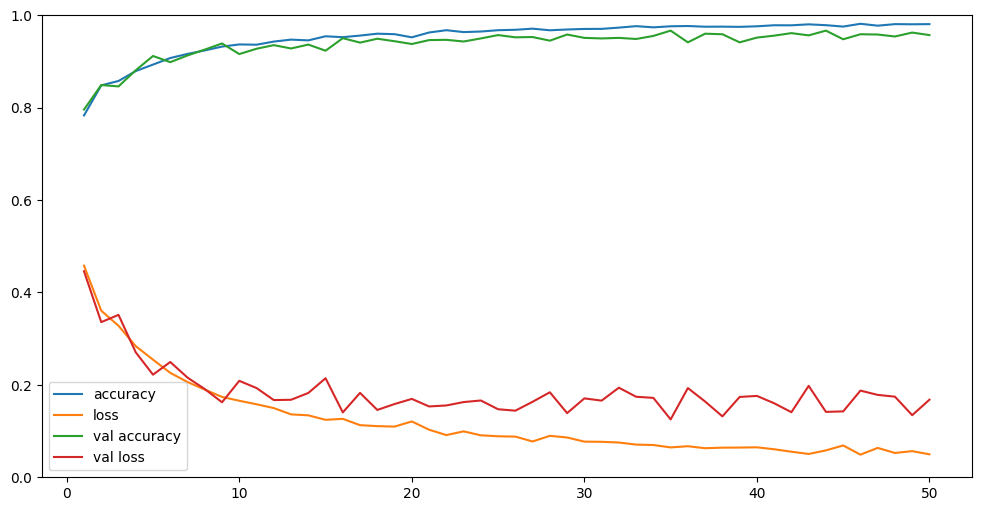

In [198]:
n_epoch = range(1,51)

plt.figure(figsize=(12,6))

seaborn.lineplot(data=history.history, x=n_epoch, y='accuracy', label='accuracy')
seaborn.lineplot(data=history.history, x=n_epoch, y='loss', label='loss')
seaborn.lineplot(data=history.history, x=n_epoch, y='val_accuracy', label='val accuracy')
seaborn.lineplot(data=history.history, x=n_epoch, y='val_loss', label='val loss')

plt.legend()
plt.ylim([0,1])
plt.ylabel(None)
plt.show()

In [199]:
model.evaluate(X_test, y_test)

24/24 [==============================] - 0s 2ms/step - loss: 0.9452 - accuracy: 0.9387


[0.9452054500579834, 0.9387223124504089]

# optimising

In [219]:
del model
del history

In [222]:
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(18,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [223]:
history = model.fit(X_train, y_train,
             validation_data=(X_val, y_val),
             epochs=50,
             batch_size=32)

Epoch 1/50
207/207 [==============================] - 1s 1ms/step - loss: 0.5237 - accuracy: 0.7295 - val_loss: 0.4183 - val_accuracy: 0.8098
Epoch 2/50
207/207 [==============================] - 0s 1ms/step - loss: 0.3981 - accuracy: 0.8271 - val_loss: 0.3727 - val_accuracy: 0.8400
Epoch 3/50
207/207 [==============================] - 0s 996us/step - loss: 0.3528 - accuracy: 0.8486 - val_loss: 0.3385 - val_accuracy: 0.8484
Epoch 4/50
207/207 [==============================] - 0s 981us/step - loss: 0.3313 - accuracy: 0.8610 - val_loss: 0.3117 - val_accuracy: 0.8641
Epoch 5/50
207/207 [==============================] - 0s 967us/step - loss: 0.3014 - accuracy: 0.8736 - val_loss: 0.2923 - val_accuracy: 0.8744
Epoch 6/50
207/207 [==============================] - 0s 1ms/step - loss: 0.2784 - accuracy: 0.8872 - val_loss: 0.2827 - val_accuracy: 0.8822
Epoch 7/50
207/207 [==============================] - 0s 1ms/step - loss: 0.2567 - accuracy: 0.8957 - val_loss: 0.2565 - val_accuracy: 0.8949


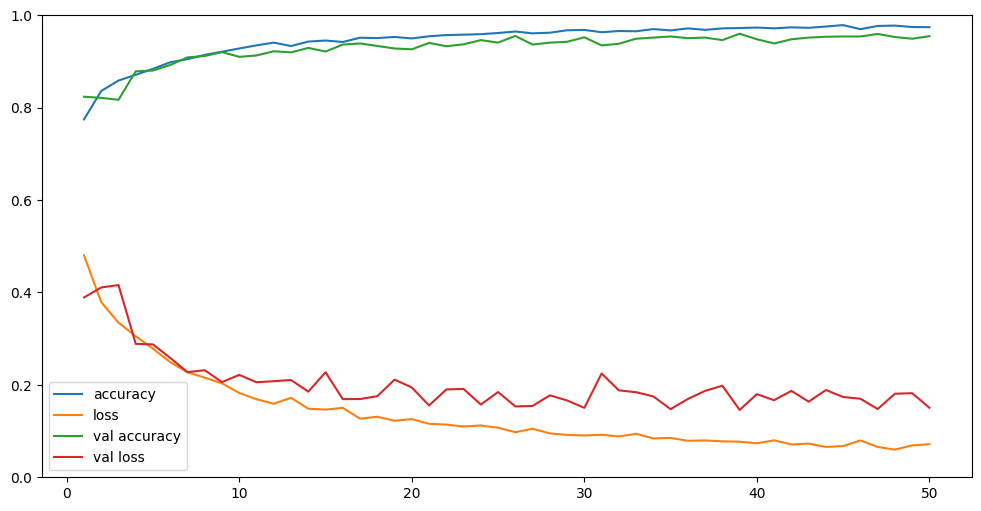

In [210]:
n_epoch = range(1,51)

plt.figure(figsize=(12,6))

seaborn.lineplot(data=history.history, x=n_epoch, y='accuracy', label='accuracy')
seaborn.lineplot(data=history.history, x=n_epoch, y='loss', label='loss')
seaborn.lineplot(data=history.history, x=n_epoch, y='val_accuracy', label='val accuracy')
seaborn.lineplot(data=history.history, x=n_epoch, y='val_loss', label='val loss')

plt.legend()
plt.ylim([0,1])
plt.ylabel(None)
plt.show()

In [211]:
model.evaluate(X_test, y_test)

24/24 [==============================] - 0s 827us/step - loss: 0.9452 - accuracy: 0.9387


[0.9452054500579834, 0.9387223124504089]

# Trying less layers

In [241]:
del model
del history

In [242]:
model = Sequential()
model.add(Dense(64, activation='leaky_relu', input_shape=(18,)))
model.add(Dense(128, activation='leaky_relu'))
model.add(Dense(64, activation='leaky_relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [243]:
history = model.fit(X_train, y_train,
             validation_data=(X_val, y_val),
             epochs=75,
             batch_size=32)

Epoch 1/75
207/207 [==============================] - 1s 1ms/step - loss: 0.5011 - accuracy: 0.7600 - val_loss: 0.4316 - val_accuracy: 0.8092
Epoch 2/75
207/207 [==============================] - 0s 947us/step - loss: 0.4094 - accuracy: 0.8178 - val_loss: 0.3915 - val_accuracy: 0.8188
Epoch 3/75
207/207 [==============================] - 0s 958us/step - loss: 0.3836 - accuracy: 0.8332 - val_loss: 0.3720 - val_accuracy: 0.8309
Epoch 4/75
207/207 [==============================] - 0s 957us/step - loss: 0.3665 - accuracy: 0.8436 - val_loss: 0.3549 - val_accuracy: 0.8466
Epoch 5/75
207/207 [==============================] - 0s 957us/step - loss: 0.3481 - accuracy: 0.8490 - val_loss: 0.3444 - val_accuracy: 0.8460
Epoch 6/75
207/207 [==============================] - 0s 961us/step - loss: 0.3315 - accuracy: 0.8569 - val_loss: 0.3337 - val_accuracy: 0.8563
Epoch 7/75
207/207 [==============================] - 0s 962us/step - loss: 0.3098 - accuracy: 0.8687 - val_loss: 0.3222 - val_accuracy: 0

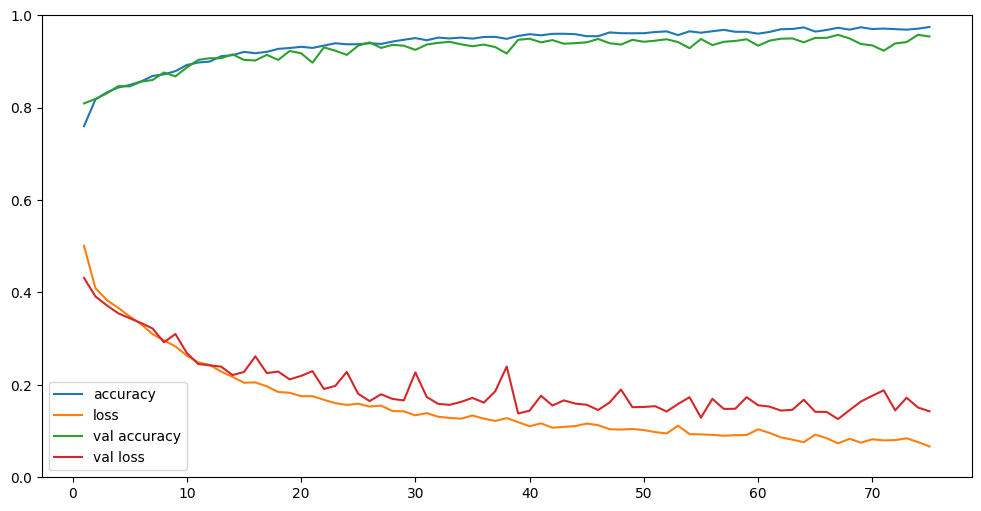

In [244]:
n_epoch = range(1,76)

plt.figure(figsize=(12,6))

seaborn.lineplot(data=history.history, x=n_epoch, y='accuracy', label='accuracy')
seaborn.lineplot(data=history.history, x=n_epoch, y='loss', label='loss')
seaborn.lineplot(data=history.history, x=n_epoch, y='val_accuracy', label='val accuracy')
seaborn.lineplot(data=history.history, x=n_epoch, y='val_loss', label='val loss')

plt.legend()
plt.ylim([0,1])
plt.ylabel(None)
plt.show()